<a href="https://colab.research.google.com/github/davidfox87/neuro_encoding_models/blob/master/compareWindowLengthRMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Clone the github repository 
!git clone https://github.com/davidfox87/neuro_encoding_models
%cd neuro_encoding_models/


Cloning into 'neuro_encoding_models'...
remote: Enumerating objects: 416, done.
remote: Total 416 (delta 0), reused 0 (delta 0), pack-reused 416
Receiving objects: 100% (416/416), 6.90 MiB | 9.05 MiB/s, done.
Resolving deltas: 100% (229/229), done.
/content/neuro_encoding_models


In [2]:
#@title add package to google colab
import sys, os
sys.path.append(os.getcwd())

In [3]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
%ls /content/gdrive/My\ Drive

 angvturns_filter.pkl
'Bread baking'/
 budget2020.gsheet
 Codes.tar.gz
'Colab Notebooks'/
'Copy of DavidFoxResume.gdoc'
'Copy of NMA-pod151-presentation.gslides'
'Copy operation sheet.pdf'
 DavidFoxResumeLatest.docx
 foo.txt
 Fox_resume_04_19_2020.pdf
'Green Card Application'/
'Health Stuff'/
'insight application materials'/
'insight loan Qs .gsheet'
 insight_short4.docx
 jobs/
 jobSearchStuff/
 KITP2018.key
'machine learning'/
 MichelleEmployersAddresses.pdf
 orn_filter.pkl
 pn_filter.pkl
'Pod 151 project brainstorming.gdoc'
'questions for angela tran.gdoc'
 SCN1588006888468.pdf
'Student Loans'/
'Tartine Bread-ElisabethPrueitt.epub'
'tax returns'/
 therapy/
'Travel documents'/
'Untitled document (1).gdoc'
'Untitled document.gdoc'
 vmoves_filter.pkl
 vymoves_filter.pkl
'Work Stuff'/


In [10]:
pkl_file = open('/content/gdrive/My Drive/' + 'angvturns' + '_filter.pkl', 'rb')
angvturns = pickle.load(pkl_file)

pkl_file = open('/content/gdrive/My Drive/' + 'vmoves' + '_filter.pkl', 'rb')
vmoves = pickle.load(pkl_file)

pkl_file = open('/content/gdrive/My Drive/' + 'vymoves' + '_filter.pkl', 'rb')
vymoves = pickle.load(pkl_file)


In [22]:
print('minimum filter length for vymoves is {}'.format(vymoves['optimal_model_param']['window_length']/50))
print('minimum filter length for vmoves is {}'.format(vmoves['optimal_model_param']['window_length']/50))

minimum filter length for vymoves is 6.0
minimum filter length for vmoves is 6.0


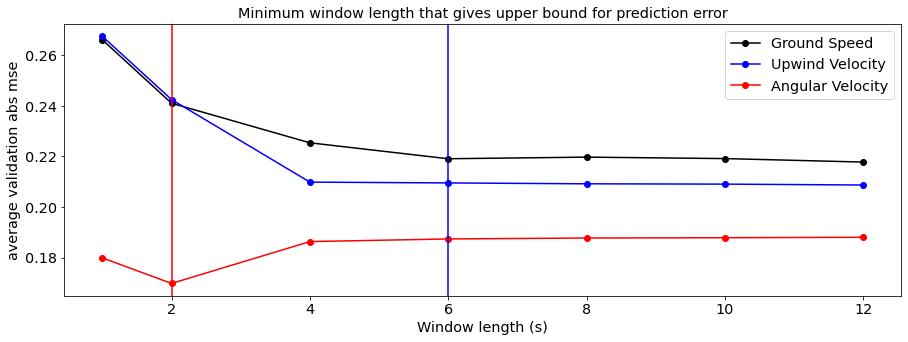

In [43]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.plot(vmoves['window_length']['window_length']/50, np.abs(vmoves['window_length']['rmse']), '-ok', label='Ground Speed')
plt.plot(vymoves['window_length']['window_length']/50, np.abs(vymoves['window_length']['rmse']), '-ob', label='Upwind Velocity')
plt.plot(angvturns['window_length']['window_length']/50, np.abs(angvturns['window_length']['rmse']), '-or', label='Angular Velocity')
plt.axvline(x=6, color='b')
plt.axvline(x=2, color='r')
plt.legend()
plt.ylabel('average validation abs mse')
plt.xlabel('Window length (s)')
plt.title('Minimum window length that gives upper bound for prediction error')

plt.savefig('/content/gdrive/My Drive/behavior_window_lengths.png', dpi=300)

In [30]:
pkl_file = open('/content/gdrive/My Drive/' + 'orn' + '_filter.pkl', 'rb')
orn = pickle.load(pkl_file)

In [31]:
pkl_file = open('/content/gdrive/My Drive/' + 'pn' + '_filter.pkl', 'rb')
pn = pickle.load(pkl_file)

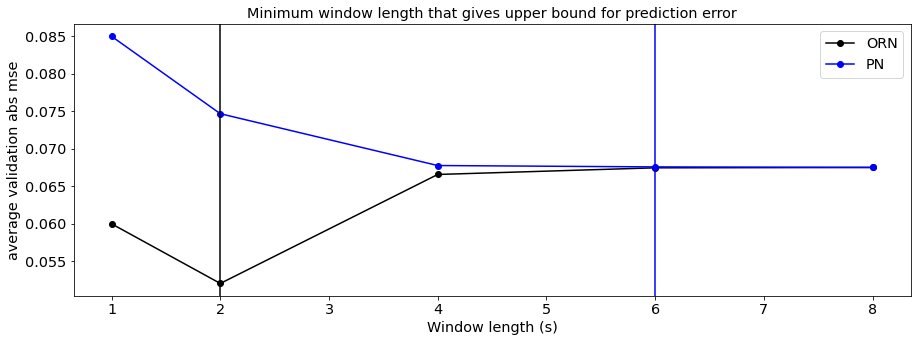

In [44]:

plt.plot(orn['window_length']['window_length']/100, np.abs(orn['window_length']['rmse']), '-ok', label='ORN')
plt.plot(pn['window_length']['window_length']/100, np.abs(pn['window_length']['rmse']), '-ob', label='PN')
plt.axvline(x=6, color='b')
plt.axvline(x=2, color='k')
plt.legend()
plt.ylabel('average validation abs mse')
plt.xlabel('Window length (s)')
plt.title('Minimum window length that gives upper bound for prediction error')

plt.savefig('/content/gdrive/My Drive/neural_window_lengths.png', dpi=300)